Create an Employee SQLite Database for Investment Firm and in that Database create EmployeeDetail table with columns names employeeid(Primary Key), name, age, department, and salary. Now add the value in Employee_Detail table of given employee

In [1]:
import sqlite3

db=sqlite3.connect('Employee.sqlite')
db

In [2]:
cur=db.cursor()
cur

In [ ]:
#creating a table
create=('create table Employee_Detail (employee_id int Primary Key,name text,age int,department text,salary int)')
cur.execute(create)

In [10]:
insert=('insert into Employee_detail values(100,"Rishav",25,"Marketing",50000),(101,"Abhishek",26,"Operations",60000),(102,"Aman",24,"Human Resource",74000)')
cur.execute(insert)

In [11]:
db.commit()

In [2]:
db

In [13]:
cur.execute('delete from Employee_Detail where employee_id=101')
db.commit()

In [14]:
var=102
cur.execute('delete from Employee_detail where employee_id=?',(var,))
db.commit()

In [15]:
var=100
cur.execute('delete from Employee_detail where employee_id=?',(var,))
db.commit()

In [16]:
employee_id=[101,102,103,104,105,106,107,108,109,110,111,112,113]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000]

In [22]:
import sqlite3

db=sqlite3.connect('Employee.sqlite')
cur=db.cursor()

length=len(name)
i=1
while i<length:
    cur.execute('Insert into Employee_Detail values(?,?,?,?,?)',(employee_id[i],name[i],age[i],department[i],salary[i]))
    i+=1
db.commit()

Find the employee_id of employee whose is working in Finance Department in Investment firm from Employee SQLite Database.
Print the employee_id as integer value

In [39]:
import sqlite3

db=sqlite3.connect('Employee.sqlite')
cur=db.cursor()

l=[]
for emp_id in cur.execute("Select employee_id from employee_detail where department='Finance'"):
    l.append(emp_id)
for i in l:
    print(i[0])

103
107


Find the number of employee working in different department in an investment firm from Employee SQLite Database.
Print the department and number of employee

In [57]:
import sqlite3

db=sqlite3.connect('Employee.sqlite')
cur=db.cursor()
l=[]
for i in cur.execute("select department,count(*) from employee_detail group by department"):
    l.append(i)
i=0
while i<len(l):
    print(l[i][0],l[i][1])
    i+=1

Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


In [54]:
import sqlite3

db=sqlite3.connect('Employee.sqlite')
cur=db.cursor()

create=('create table Employee_Detail (employee_id int Primary Key,name text,age int,department text,salary int)')

employee_id=[101,102,103,104,105,106,107,108,109,110,111,112]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000]

length=len(name)
i=0
while i<length:
    cur.execute('Insert into Employee_Detail values(?,?,?,?,?)',(employee_id[i],name[i],age[i],department[i],salary[i]))
    i+=1
db.commit()

l=[]
for i in cur.execute("select department,count(*) from employee_detail group by department"):
    l.append(i)
i=0
while i<len(l):
    print(l[i][0],l[i][1])
    i+=1

2

In [60]:
print("Finance 2\nHuman Resource 2\nIT 2\nMarketing 4\nOperations 2")

Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


..

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the count of each genre present in IMDB movie dataset?
Print the Genre and number of movies present in that genre.
Note: Ignore the empty value present in genre.

In [19]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
df=pd.read_sql_query("select genre,count(*) from genre GROUP by genre",db)
shape=df.shape
i=1
while i<shape[0]:
    print(df.iloc[i][0],df.iloc[i][1])
    i+=1

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.

In [73]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
df_earning=pd.read_sql_query("select * from earning",db)
df_total=df_earning['Domestic']+df_earning['Worldwide']
maximum=df_total.idxmax()
movie_id1=int(df_earning.loc[maximum][0])
cur.execute("select rating from imdb where movie_id=?",(movie_id1,))
ans=cur.fetchall()
print(ans[0][0])

8.1


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie.

In [113]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
df_movie=pd.read_sql_query("select max(TotalVotes),Title,Rating from IMDB",db)
shape=df_movie.shape
i=0
while i<shape[0]:
    print(df_movie.iloc[i][1],df_movie.iloc[i][2])
    i+=1

Inception (2010) 8.8


IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the Movie with Longest-Running Time from IMDB Movie database.

Print the name of movie and running time as integer value.

In [188]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
df_movie=pd.read_sql_query("select Title,Runtime from IMDB",db)
df_movie["Runtime"]=df_movie["Runtime"].str.split(" ", n = 1, expand = True)
df_movie['Runtime'].replace('','0',inplace=True)
df_movie['Runtime']=df_movie['Runtime'].astype('int')
max_runtime=df_movie['Runtime'].idxmax()
print(df_movie['Title'].iloc[max_runtime],df_movie['Runtime'].iloc[max_runtime])

The Wolf of Wall Street (2013) 180


IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has maximum net profit in IMDB Movie Database.

Print the movie name.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [213]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
df_earning=pd.read_sql_query("select * from earning",db)
df_total=df_earning['Domestic']+df_earning['Worldwide']
df_movie=pd.read_sql_query("select title,budget from imdb",db)
df_movie['Budget'].replace('','0',inplace=True)
df_movie['Budget']=df_movie['Budget'].astype('int')
df_net_profit=df_total-df_movie['Budget']
max_net_profit=df_net_profit.idxmax()
print(df_movie['Title'].iloc[max_net_profit])

Star Wars: The Force Awakens (2015)


IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the least budgeted movie in IMDB Movie Database.

If there is more than one least budgeted movies then print the movie which has maximum net profit.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [290]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
df_earning=pd.read_sql_query("select * from earning",db)
df_earning['Domestic'].replace('','0',inplace=True)
df_earning['Worldwide'].replace('','0',inplace=True)
df_total=df_earning['Domestic']+df_earning['Worldwide']
df_movie=pd.read_sql_query("select title,budget from imdb",db)
df_movie['Budget'].replace('','0',inplace=True)
df_movie['Budget']=df_movie['Budget'].astype('int')
df_net_profit=df_total-df_movie['Budget']
m=df_net_profit.idxmin()
print(df_movie['Title'].iloc[m],df_net_profit.iloc[m])

Flipped (2010) -10489576.0


In [254]:
df_movie_name=df_movie['Title']

In [250]:
d={}
shape=df_net_profit.shape
for i in range(shape[0]):
    if d[i] in df_movie.iloc[i]:
        

(117,)

In [256]:
d=pd.Series(df_net_profit.values,index=df_movie_name).to_dict()

In [279]:
from heapq import nsmallest
from operator import itemgetter

In [287]:
ress = nsmallest(10, d, key = d.get)

In [294]:
res = dict(sorted(d.items(), key = itemgetter(1))[:10])

In [295]:
res

{'Flipped\xa0(2010)': -10489576.0,
 'Disconnect\xa0(2012)': -7126200.0,
 'Tyrannosaur\xa0(2011)': -955358.0,
 'Tucker and Dale vs Evil\xa0(2010)': -26646.0,
 'Detachment\xa0(2011)': 145378.0,
 'I, Daniel Blake\xa0(2016)': 520708.0,
 'Short Term 12\xa0(2013)': 1026200.0,
 'Captain Fantastic\xa0(2016)': 6759472.0,
 'Me and Earl and the Dying Girl\xa0(2015)': 7833165.0,
 'Hunt for the Wilderpeople\xa0(2016)': 7910936.0}

In [286]:
for i in range(len(res)):
    print(res[i])

KeyError: 0

In [315]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')

earning = pd.read_sql_query('select * from earning' , db)
imdb = pd.read_sql_query('select * from IMDB' , db)

imdb_earning = pd.merge(imdb,earning,on ='Movie_id')
imdb_earning['Domestic'].replace('',0,inplace = True)
imdb_earning['Worldwide'].replace('',0,inplace = True)
imdb_earning['Total Earning'] = imdb_earning['Domestic'] + imdb_earning['Worldwide']
imdb_earning['Budget'].replace('',0,inplace = True)

least_budget = imdb_earning[imdb_earning['Budget'] == sorted(imdb_earning['Budget'].values)[3]].values
profit_1 = least_budget[0][54] - least_budget[0][5]
profit_2 = least_budget[1][54] - least_budget[1][5]

if profit_1 > profit_2:
    print(least_budget[0][1])
else:
    print(least_budget[1][1])

Short Term 12 (2013)


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.

Print the Year and name of the movie which was the highest grosser in that year.

Note:Print the year in ascending order.

In [121]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
df_earning=pd.read_sql_query("select * from earning",db)
df_earning['Domestic'].replace('','0',inplace=True)
df_earning['Worldwide'].replace('','0',inplace=True)
df_movie=pd.read_sql_query("select Movie_id,title from imdb",db)
df_new=df_earning.merge(df_movie,how='inner')
df_new['highest_grossing']=df_new['Domestic']+df_new['Worldwide']
df_new.to_sql("Highest_grossing",db,if_exists="replace")

df_year= df_new["Title"].str.rsplit("(", n = 1, expand = True)
df_year=df_year[1].str.rsplit(")", n = 1, expand = True)
df_year.drop([1],axis=1,inplace=True)

df_movie=df_new["Title"].str.rsplit("(", n = 1, expand = True)
df_movie.drop([1],axis=1,inplace=True)

df_movie.columns=['Title']
df_year.columns=['Year']

df_new_data=pd.concat([df_movie,df_year,df_new['highest_grossing']],axis=1)

df_new_data.to_sql("Moives",db,if_exists="replace")

df_2010=pd.read_sql_query("SELECT Title,max(highest_grossing),year FROM Moives WHERE year=2010",db)
df_2011=pd.read_sql_query("SELECT Title,max(highest_grossing),year FROM Moives WHERE year=2011",db)
df_2012=pd.read_sql_query("SELECT Title,max(highest_grossing),year FROM Moives WHERE year=2012",db)
df_2013=pd.read_sql_query("SELECT Title,max(highest_grossing),year FROM Moives WHERE year=2013",db)
df_2014=pd.read_sql_query("SELECT Title,max(highest_grossing),year FROM Moives WHERE year=2014",db)
df_2015=pd.read_sql_query("SELECT Title,max(highest_grossing),year FROM Moives WHERE year=2015",db)
df_2016=pd.read_sql_query("SELECT Title,max(highest_grossing),year FROM Moives WHERE year=2016",db)

print(df_2010.iloc[0][2],df_2010.iloc[0][0])
print(df_2011.iloc[0][2],df_2011.iloc[0][0])
print(df_2012.iloc[0][2],df_2012.iloc[0][0])
print(df_2013.iloc[0][2],df_2013.iloc[0][0])
print(df_2014.iloc[0][2],df_2014.iloc[0][0])
print(df_2015.iloc[0][2],df_2015.iloc[0][0])
print(df_2016.iloc[0][2],df_2016.iloc[0][0])

2010 Toy Story 3 
2011 Rise of the Planet of the Apes 
2012 The Avengers 
2013 The Hunger Games: Catching Fire 
2014 Guardians of the Galaxy 
2015 Star Wars: The Force Awakens 
2016 Rogue One 


In [3]:
## Open and read data file as specified in the question
## Print the required output in given format
import sqlite3
import pandas as pd
db=sqlite3.connect("IMDB.sqlite")
ans=pd.read_sql_query("select * from IMDB INNER JOIN earning on IMDB.Movie_id=earning.Movie_id",db)
ans.dropna()
ans['year']=ans["Title"].str[-5:-1]
ans["year"]=ans["year"].astype(int)
ans["grossing"]=ans["Domestic"]+ans["Worldwide"]
id=ans["year"].value_counts().sort_index()
y=id.index.tolist()
for i in range(len(y)):
    ans1=ans[ans["year"]==y[i]]
    ans1=ans1[ans1["grossing"]==ans1["grossing"].describe()["max"]]
    print(y[i],ans1["Title"].iloc[0])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in long_scalars


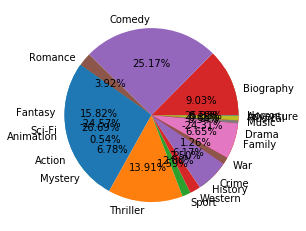

In [66]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db=sqlite3.connect("IMDB.sqlite")
df_genre=pd.read_sql_query("select IMDB.budget,genre.genre from IMDB INNER JOIN genre on IMDB.Movie_id=genre.Movie_id",db)

df_genre['Budget'].replace('','0',inplace=True)

df_genre['Budget']=df_genre['Budget'].astype('int')
df_budget=df_genre['Budget']
df_genres=df_genre['genre']
d={}
j=0
for i in df_genres:
    if i in d:
        d[i]=d[i]+df_budget[j]
    else:
        d[i]=df_budget[j]
    j+=1
del d['']

X=[]
Y=[]
for i in d:
    X.append(i)
    Y.append(d[i])
    
plt.pie(Y,autopct='%.2f%%',labels=X)
plt.show()

sumy=sum(Y)
for i in range(len(Y)):
    print(X[i],format((Y[i]/sumy)*100, '.2f')) 

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

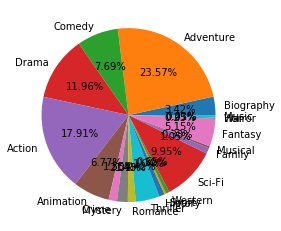

Biography 3.42
Adventure 23.57
Comedy 7.69
Drama 11.96
Action 17.91
Animation 6.77
Crime 1.55
Mystery 2.01
Romance 1.45
Thriller 4.42
History 1.04
Sport 0.32
Western 0.65
Sci-Fi 9.95
Family 1.05
Musical 0.38
Fantasy 5.15
War 0.25
Horror 0.01
Music 0.43


In [82]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db=sqlite3.connect("IMDB.sqlite")
df_genre_earning=pd.read_sql_query("select genre.genre,earning.domestic,earning.worldwide from genre INNER JOIN earning on genre.Movie_id=earning.Movie_id",db)

df_genre_earning['Total Earning']=df_genre_earning['Domestic']+df_genre_earning['Worldwide']

d={}
j=0
for i in df_genre_earning['genre']:
    if i in d:
        d[i]=d[i]+df_genre_earning['Total Earning'].iloc[j]
    else:
        d[i]=df_genre_earning['Total Earning'].iloc[j]
    j+=1
del d['']
X=[]
Y=[]
for i in d:
    X.append(i)
    Y.append(d[i])
plt.pie(Y,autopct='%.2f%%',labels=X)
plt.show()

sumy=sum(Y)
for i in range(len(Y)):
    print(X[i],format((Y[i]/sumy)*100, '.2f')) 

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.

Print the movie name.

Movies has multiple genre.

In [93]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db=sqlite3.connect("IMDB.sqlite")
cur=db.cursor()
df_genre_earning=pd.read_sql_query("select IMDB.Title FROM IMDB INNER JOIN genre on IMDB.Movie_id=genre.Movie_id WHERE Rating>=8 AND genre in ('Sci-Fi','Mystery') limit 1;",db)
cur.execute("select IMDB.Title FROM IMDB INNER JOIN genre on IMDB.Movie_id=genre.Movie_id WHERE Rating>=8 AND genre in ('Sci-Fi','Mystery') limit 1")
ans=cur.fetchall()
print(ans[0][0])

Arrival (2016)
